<a href="https://colab.research.google.com/github/1Un/I_am_a_Professional_Olympiad_2020_2021_ML/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/mydrive/')

Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
train_df=pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/Olimpiada/ML/Task_1/train.csv')
X_test=pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/Olimpiada/ML/Task_1/test.csv')

In [4]:
y_train=train_df.loc[:,['Onshore/Offshore']]
y_train.value_counts()

Onshore/Offshore
ONSHORE             211
OFFSHORE             93
ONSHORE-OFFSHORE      5
dtype: int64

In [5]:
add_data=train_df.loc[train_df['Onshore/Offshore']=='ONSHORE-OFFSHORE',:].index

In [6]:
for i in range(19):
  train_df=train_df.append(train_df.iloc[add_data,:],ignore_index=True)

In [7]:
y_train=train_df.loc[:,['Onshore/Offshore']]
y_train.value_counts()

Onshore/Offshore
ONSHORE             211
ONSHORE-OFFSHORE    100
OFFSHORE             93
dtype: int64

In [8]:
y_train.shape

(404, 1)

In [9]:
X_train=train_df.drop(['Onshore/Offshore'],axis=1)#(309, 11)
X_train.shape

(404, 11)

In [10]:
X_train.head()

,Tectonic regime,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,OIL,DEVELOPING,INVERSION/WRENCH,3520,NEOGENE,SANDSTONE,2460.0,220.0,20.0,45.0
1,GRAVITY/EXTENSION/EVAPORITE,OIL,MATURE PRODUCTION,SALT/PASSIVE MARGIN,9967,CRETACEOUS,LIMESTONE,427.0,160.0,19.0,175.0
2,GRAVITY/EXTENSION/EVAPORITE,OIL,MATURE PRODUCTION,PASSIVE MARGIN,8700,CRETACEOUS,LIMESTONE,95.0,15.0,12.0,20.0
3,COMPRESSION,OIL,DECLINING PRODUCTION,THRUST,5084,CRETACEOUS,SANDSTONE,328.0,300.0,13.0,600.0
4,INVERSION/COMPRESSION/EXTENSION,OIL,DECLINING PRODUCTION,INVERSION/RIFT,1030,CRETACEOUS,SANDSTONE,260.0,33.0,24.0,182.0


In [11]:
data_types = pd.DataFrame(data={'dtypes':X_train.dtypes})
cat_features=data_types.loc[(data_types['dtypes']=='object')].index

In [12]:
# for f in cat_features:
#   display(pd.DataFrame(data={'train':X_train[f].value_counts(),
#                              'test' :X_test[f].value_counts()}).head(57))
#   print('========================================')

In [13]:
for df in [X_train,X_test]:
  for f in cat_features:
    df[f]=df[f].str.split('/')


In [14]:
X_train[cat_features].head()

,Tectonic regime,Hydrocarbon type,Reservoir status,Structural setting,Period,Lithology
0,"[STRIKE-SLIP, TRANSPRESSION, BASEMENT-I]",[OIL],[DEVELOPING],"[INVERSION, WRENCH]",[NEOGENE],[SANDSTONE]
1,"[GRAVITY, EXTENSION, EVAPORITE]",[OIL],[MATURE PRODUCTION],"[SALT, PASSIVE MARGIN]",[CRETACEOUS],[LIMESTONE]
2,"[GRAVITY, EXTENSION, EVAPORITE]",[OIL],[MATURE PRODUCTION],[PASSIVE MARGIN],[CRETACEOUS],[LIMESTONE]
3,[COMPRESSION],[OIL],[DECLINING PRODUCTION],[THRUST],[CRETACEOUS],[SANDSTONE]
4,"[INVERSION, COMPRESSION, EXTENSION]",[OIL],[DECLINING PRODUCTION],"[INVERSION, RIFT]",[CRETACEOUS],[SANDSTONE]


In [15]:
#pd.get_dummies(X_train[cat_features[0]].str.split('/').apply(pd.Series).stack().sum(level=0))

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

In [17]:
mlb = MultiLabelBinarizer()

In [18]:
X_train.head()

,Tectonic regime,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,"[STRIKE-SLIP, TRANSPRESSION, BASEMENT-I]",[OIL],[DEVELOPING],"[INVERSION, WRENCH]",3520,[NEOGENE],[SANDSTONE],2460.0,220.0,20.0,45.0
1,"[GRAVITY, EXTENSION, EVAPORITE]",[OIL],[MATURE PRODUCTION],"[SALT, PASSIVE MARGIN]",9967,[CRETACEOUS],[LIMESTONE],427.0,160.0,19.0,175.0
2,"[GRAVITY, EXTENSION, EVAPORITE]",[OIL],[MATURE PRODUCTION],[PASSIVE MARGIN],8700,[CRETACEOUS],[LIMESTONE],95.0,15.0,12.0,20.0
3,[COMPRESSION],[OIL],[DECLINING PRODUCTION],[THRUST],5084,[CRETACEOUS],[SANDSTONE],328.0,300.0,13.0,600.0
4,"[INVERSION, COMPRESSION, EXTENSION]",[OIL],[DECLINING PRODUCTION],"[INVERSION, RIFT]",1030,[CRETACEOUS],[SANDSTONE],260.0,33.0,24.0,182.0


In [19]:
X_train_b=X_train.drop(cat_features,axis=1)
X_test_b=X_test.drop(cat_features,axis=1)

In [20]:
X_train_b.head()

,Depth,Gross,Netpay,Porosity,Permeability
0,3520,2460.0,220.0,20.0,45.0
1,9967,427.0,160.0,19.0,175.0
2,8700,95.0,15.0,12.0,20.0
3,5084,328.0,300.0,13.0,600.0
4,1030,260.0,33.0,24.0,182.0


In [21]:
num_features=X_train_b.columns


In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
X_train_b[num_features]=scaler.fit_transform(X_train_b)
X_test_b[num_features]=scaler.fit_transform(X_test_b)

In [24]:
X_train_b.head()

,Depth,Gross,Netpay,Porosity,Permeability
0,-0.689829,1.433179,0.067041,0.041787,-0.516444
1,1.146382,-0.305270,-0.170207,-0.074064,-0.381562
2,0.785520,-0.589168,-0.743555,-0.885022,-0.542382
3,-0.244376,-0.389926,0.383371,-0.769171,0.059397
4,-1.399021,-0.448074,-0.672380,0.505191,-0.374299


In [25]:
for f in cat_features:
  mlb.fit(X_train[f])
  print(mlb.classes_)
  mlb.fit(X_test[f])
  print(mlb.classes_)
  print('=================================================')

['BASEMENT-I' 'COMPRESSION' 'DIAPIR' 'EROSION' 'EVAPORITE' 'EXTENSION'
 'GRAVITY' 'INVERSION' 'LINKED' 'REACTIVATION' 'SHALE' 'STRIKE-SLIP'
 'SYNSEDIMENTATION' 'TRANSPRESSION' 'TRANSTENSION' 'UPLIFT']
['BASEMENT-I' 'COMPRESSION' 'DIAPIR' 'EROSION' 'EVAPORITE' 'EXTENSION'
 'GRAVITY' 'INVERSION' 'LINKED' 'SHALE' 'STRIKE-SLIP' 'SYNSEDIMENTATION'
 'TRANSPRESSION' 'TRANSTENSION']
['CARBON DIOXIDE' 'GAS' 'GAS-CONDENSATE' 'METHANE HYDRATE' 'OIL']
['BITUMEN' 'CARBON DIOXIDE' 'GAS' 'GAS-CONDENSATE' 'OIL']
['ABANDONED' 'CONTINUING DEVELOPMENT' 'DECLINING PRODUCTION' 'DEPLETED'
 'DEVELOPING' 'MATURE PRODUCTION' 'NEARLY DEPLETED' 'PLATEAU PRODUCTION'
 'REJUVENATING' 'SECOND PLATEAU PRODUTION' 'UNDEVELOPED' 'UNKNOWN']
['ABANDONED' 'CONTINUING DEVELOPMENT' 'DECLINING PRODUCTION' 'DEVELOPING'
 'MATURE PRODUCTION' 'NEARLY DEPLETED' 'PLATEAU PRODUCTION' 'REJUVENATING'
 'SECOND PLATEAU PRODUTION' 'TEMPORARILY SHUT-IN' 'UNDEVELOPED' 'UNKNOWN']
['' 'BACKARC' 'DELTA' 'FOREARC' 'FORELAND' 'INTRACRATONIC' 'I

In [26]:
#пока повтор не вклюаею так как может получиться что 1+1=2
for f in cat_features:
  tmp=pd.DataFrame(mlb.fit_transform(X_train[f]), columns=mlb.classes_)  
  for cls in mlb.classes_:
    if cls not in X_train_b.keys():
      X_train_b=pd.concat([X_train_b,tmp[[cls]]],axis=1)

  tmp=pd.DataFrame(mlb.fit_transform(X_test[f]), columns=mlb.classes_)  
  for cls in mlb.classes_:
    if cls not in X_test_b.keys():
      X_test_b=pd.concat([X_test_b,tmp[[cls]]],axis=1)
  

In [27]:
# for f in cat_features:
#   tmp=pd.DataFrame(mlb.fit_transform(X_train[f]), columns=mlb.classes_)  
#   X_train_b=pd.concat([X_train_b,tmp],axis=1)
#   tmp=pd.DataFrame(mlb.fit_transform(X_test[f]), columns=mlb.classes_) 
#   X_test_b=pd.concat([X_test_b,tmp],axis=1)

In [28]:
X_train_b.shape#90 80

(404, 88)

In [29]:
X_test_b.shape

(133, 79)

In [30]:
drop_list=[]
drop_list=drop_list+list(list(set(list(X_train_b.keys()))-set(list(X_test_b.keys()))))
drop_list=drop_list+list(set(list(X_test_b.keys()))-set(list(X_train_b.keys())))
drop_list

['',
 'CARBONIFEROUS-CRETACEOUS',
 'VOLCANICS',
 'REACTIVATION',
 'CHERT',
 'PROTEROZOIC-CAMBRIAN',
 'DIATOMITE',
 'BASEMENT',
 'METHANE HYDRATE',
 'ARCHEAN',
 'JURASSIC-CRETACEOUS',
 'DEPLETED',
 'PALEOZOIC',
 'UPLIFT',
 'MESOZOIC',
 'CAMBRIAN',
 'CONGLOMERATE',
 'BITUMEN',
 'GLAUCONITIC SANDSTONE',
 'PALEOZOIC-CRETACEOUS',
 'SILURIAN',
 'TEMPORARILY SHUT-IN',
 'DEVONIAN-CARBONIFEROUS',
 'DEVONIAN-PERMIAN',
 'PERMIAN-TRIASSIC']

In [31]:
for f in drop_list:
  if f in list(X_test_b.keys()):
    X_test_b.drop([f],axis=1,inplace=True)
  if f in list(X_train_b.keys()):
    X_train_b.drop([f],axis=1,inplace=True)

In [32]:
X_test_b.shape

(133, 71)

In [33]:
X_train_b.shape

(404, 71)

In [34]:
y_train.head()

,Onshore/Offshore
0,OFFSHORE
1,OFFSHORE
2,ONSHORE
3,ONSHORE
4,ONSHORE


In [35]:
y_train['Onshore/Offshore'].unique()

array(['OFFSHORE', 'ONSHORE', 'ONSHORE-OFFSHORE'], dtype=object)

In [36]:
from sklearn.preprocessing import OrdinalEncoder

In [37]:
enc = OrdinalEncoder()

In [38]:
enc.fit(y_train[['Onshore/Offshore']])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [39]:
y_train['Onshore/Offshore']=enc.transform(y_train[['Onshore/Offshore']])

In [40]:
y_train['Onshore/Offshore'].value_counts()

1.0    211
2.0    100
0.0     93
Name: Onshore/Offshore, dtype: int64

In [41]:
y_train.shape

(404, 1)

In [42]:
pd.DataFrame(enc.inverse_transform(y_train[['Onshore/Offshore']])).head()

,0
0,OFFSHORE
1,OFFSHORE
2,ONSHORE
3,ONSHORE
4,ONSHORE


In [43]:
import torch
from torch import nn
from torch import functional as F
from torch.utils.data import Dataset, DataLoader

In [44]:
def batch_generator(X, y, batch_size):
    np.random.seed(42)
    perm = np.random.permutation(len(X))
    data_size = len(X)
    X = X[perm]
    y = y[perm]
    
    num_batches_per_epoch = int((data_size-1)/batch_size) + 1
    for batch_num in range(num_batches_per_epoch):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        X_batch = X[start_index:end_index]
        y_batch = y[start_index:end_index]
        yield (X_batch, y_batch)

In [45]:
X = torch.FloatTensor(X_train_b.values)
y = torch.LongTensor(y_train.values.reshape(-1))
X_test_tensor=torch.FloatTensor(X_test_b.values)


In [46]:
inp=X_train_b.shape[1]

In [47]:
k=2

In [48]:
torch.manual_seed(42) 
np.random.seed(42)
model = nn.Sequential(
  
    nn.Linear(inp, inp*3),    
    nn.BatchNorm1d(inp*3), 
    #nn.Dropout(0.2),
    nn.ReLU(),
    
    nn.Linear(inp*3, inp*2),
    nn.BatchNorm1d(inp*2),    
    #nn.Dropout(0.3),
    nn.ReLU(), 

    nn.Linear(inp*2, inp),
    nn.BatchNorm1d(inp),    
    #nn.Dropout(0.3),
    nn.ReLU(),   

    nn.Linear(inp, 3)
)
    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=7,gamma=0.5,verbose=True)


Adjusting learning rate of group 0 to 1.0000e-02.


In [49]:
def train(num_epoch):
    train_losses = []
    test_losses = []

    train_loss_arr=[]
    train_acc_arr=[]

    for i in range(num_epoch):
        running_loss = 0.0
        running_corrects = 0
        processed_size = 0

        
        for X_batch, y_batch in batch_generator(X, y, 64):            
            model.train(True)
            y_pred=model(X_batch)
            loss=loss_fn(y_pred,y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()                                 
            running_loss += loss.item() * y_batch.size(0)            
            running_corrects += torch.sum(torch.argmax(y_pred.detach(), 1) == y_batch)            
            processed_size += y_batch.size(0)

        train_loss_arr.append(running_loss / processed_size)        
        train_acc_arr.append((running_corrects / processed_size).numpy())
        scheduler.step()
           
        
    return train_loss_arr,train_acc_arr

In [50]:
train_loss_arr,train_acc_arr=train(10)

Adjusting learning rate of group 0 to 1.0000e-02.
Adjusting learning rate of group 0 to 1.0000e-02.
Adjusting learning rate of group 0 to 1.0000e-02.
Adjusting learning rate of group 0 to 1.0000e-02.
Adjusting learning rate of group 0 to 1.0000e-02.
Adjusting learning rate of group 0 to 1.0000e-02.
Adjusting learning rate of group 0 to 5.0000e-03.
Adjusting learning rate of group 0 to 5.0000e-03.
Adjusting learning rate of group 0 to 5.0000e-03.
Adjusting learning rate of group 0 to 5.0000e-03.


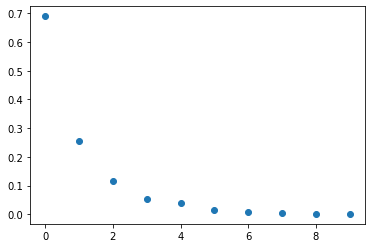

In [51]:
plt.scatter(range(len(train_loss_arr)), train_loss_arr)


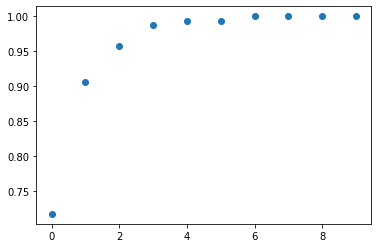

In [52]:
plt.scatter(range(len(train_acc_arr)), train_acc_arr)


In [53]:
model.eval()
with torch.no_grad():
  y_pred = model(X_test_tensor)  

In [54]:
sm=torch.nn.Softmax(dim=1)

In [55]:
pred=torch.argmax(sm(y_pred),dim=1).numpy()

In [56]:
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1])

In [57]:
prediction=pd.DataFrame(data={'prediction':pred})

In [58]:
prediction['prediction']=enc.inverse_transform(prediction)

In [59]:
prediction.to_csv("prediction.csv", header=None,index=False)

In [60]:
pd.read_csv('/content/prediction.csv',header=None).head()

,0
0,ONSHORE
1,ONSHORE
2,ONSHORE
3,OFFSHORE
4,ONSHORE


In [61]:
y_train.shape

(404, 1)